# Preprocessing

This note we'll preprocessing our dataset to extract the labels to feed our CNN. The dataset can be find [here](https://susanqq.github.io/UTKFace/).

<img src="images/dataset.png" alt="UTKFace Dataset" width="740" height="180" />


After extract the zip file move all images to folder **data/**


## UTKFace 

UTKFace dataset is a large-scale face dataset with long age span (range from **0 to 116** years old). The dataset consists of over **20,000** face images with annotations of **age**, **gender**, and **ethnicity**. The images cover large variation in pose, facial expression, illumination, occlusion, resolution, etc. This dataset could be used on a variety of tasks, e.g., face detection, age estimation, age progression/regression, landmark localization, etc. 

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
from glob import glob
import re
%matplotlib inline

## Data Input

In [2]:
def save(obj, name):
    with open(name, 'wb') as f:
        pkl.dump(obj, f, pkl.HIGHEST_PROTOCOL)

def load(name):
    with open(name, 'rb') as f:
        return pkl.load(f)

def extract_labels(_list_images):
    '''[age]_[gender]_[race]_[date&time]'''
    _list_ret = []
    for name in _list_images:
        features = name.split('_')
        _list_ret.append((features[0], features[1], features[2]))
    return _list_ret

In [3]:
DATA_PATH = 'data/'
files = glob(DATA_PATH+'*.jpg')
images = [re.sub('data/', '', re.sub(r'.jpg.chip.jpg', '', x)) for x in files]
labels = extract_labels(images)
print(labels[np.random.randint(0, len(images))])
print(len(images))

('38', '0', '0')
23708


In [47]:
def images_to_pkl(files, labels, pos, name, max_batch):
    X = []
    y = []
    batch_index = 1
    for index, (path, lbl) in enumerate(zip(files, labels)):
        image = Image.open(path)
        data_x = np.array(image, dtype=np.uint8)
        data_y = lbl[pos]
        X.append(data_x)
        y.append(data_y)
        if index == max_batch*batch_index:
            save({'X': X, 'y': y }, 'data/{:}/0{:}.pkl'.format(name, batch_index))
            X = []
            y = []
            batch_index += 1
    # remaining batch
    if len(X) >= 0:
        save({'X': X, 'y': y }, 'data/{:}/0{:}.pkl'.format(name, batch_index))
        
def describe_data(labels, data):
    y_pos = np.arange(len(labels))
    plt.bar(y_pos, data, align='center')
    plt.xticks(y_pos, labels)
    plt.ylabel('Length')
    plt.title('Data')
    plt.show()

### Data Gender

In [23]:
images_to_pkl(files, labels, 1, 'gender', 5000)

In [61]:
gender_data = glob('data/gender/*.pkl')
batch_gender = load(gender_data[np.random.randint(len(gender_data))])
gender_x, gender_y = len(batch_gender['X']), len(batch_gender['y'])
print(gender_data)
print(gender_x, gender_y)
print(batch_gender['X'][np.random.randint(gender_x)])
print(batch_gender['y'][np.random.randint(gender_y)])

['data/gender/02.pkl', 'data/gender/03.pkl', 'data/gender/01.pkl', 'data/gender/04.pkl', 'data/gender/05.pkl']
5000 5000
[[[75 57 57]
  [70 52 52]
  [66 48 48]
  ...
  [ 0  0  0]
  [ 0  1  0]
  [ 0  2  1]]

 [[72 54 54]
  [70 52 52]
  [68 50 50]
  ...
  [ 0  0  0]
  [ 0  1  0]
  [ 0  2  1]]

 [[69 51 51]
  [70 52 52]
  [72 54 54]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  2  1]]

 ...

 [[11 12  7]
  [ 9 10  5]
  [ 5  5  3]
  ...
  [ 1  1  1]
  [ 2  2  2]
  [ 1  1  1]]

 [[ 8  9  4]
  [ 6  7  2]
  [ 4  4  2]
  ...
  [ 1  1  1]
  [ 2  2  2]
  [ 2  2  2]]

 [[ 7  8  3]
  [ 6  7  2]
  [ 4  4  2]
  ...
  [ 1  1  1]
  [ 2  2  2]
  [ 2  2  2]]]
1


In [ ]:
count = [0,0]
for file in gender_data:
    data = load(file)
    if data != None:
        for label in data['y']:
            if int(label) == 0:
                count[0] += 1
            else:
                count[1] += 1

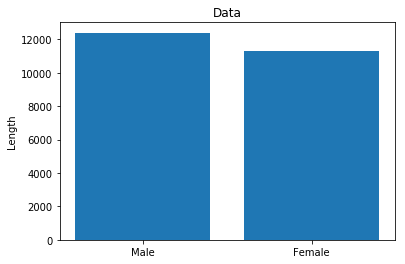

[12391, 11317]


In [63]:
describe_data(('Male', 'Female'), count)
print(count)

### Data Age (Regressor)

In [19]:
images_to_pkl(files, labels, 0, 'age', 5000)

In [45]:
age_data_res = glob('data/age/*.pkl')
batch_age_res = load(age_data_res[np.random.randint(len(age_data_res))])
age_res_x, age_res_y = len(batch_age_res['X']), len(batch_age_res['y'])
print(age_data_res)
print(age_res_x, age_res_y)
print(batch_age_res['X'][np.random.randint(age_res_x)])
print(batch_age_res['y'][np.random.randint(age_res_y)])

['data/age/02.pkl', 'data/age/03.pkl', 'data/age/01.pkl', 'data/age/04.pkl', 'data/age/05.pkl']
3707 3707
[[[ 70  61  78]
  [ 85  77  92]
  [ 69  61  76]
  ...
  [ 39  40  45]
  [ 48  49  54]
  [ 42  43  48]]

 [[ 60  52  67]
  [ 76  68  83]
  [ 76  70  84]
  ...
  [ 57  58  63]
  [ 60  61  66]
  [ 44  45  50]]

 [[ 54  48  62]
  [ 65  59  73]
  [ 85  79  91]
  ...
  [ 64  65  70]
  [ 65  66  71]
  [ 47  48  53]]

 ...

 [[120 101  95]
  [133 114 108]
  [153 132 127]
  ...
  [ 34  32  45]
  [ 34  32  45]
  [ 33  31  44]]

 [[175 150 143]
  [173 148 141]
  [172 145 138]
  ...
  [ 34  32  45]
  [ 33  31  44]
  [ 32  30  43]]

 [[174 144 134]
  [167 137 127]
  [163 133 123]
  ...
  [ 34  32  45]
  [ 33  31  44]
  [ 32  30  43]]]
57


In [46]:
count = [0 for i in range(116)]
for file in age_data_res:
    data = load(file)
    if data != None:
        for label in data['y']:
            count[int(label)-1] += 1

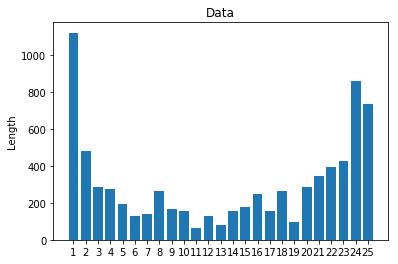

[1123, 482, 289, 273, 196, 131, 139, 263, 166, 156, 65, 130, 81, 157, 177, 247, 158, 262, 98, 284, 346, 395, 426, 859, 734]


In [48]:
describe_data(tuple([i for i in range(1,26)]), count[:25])
print(count[:25])

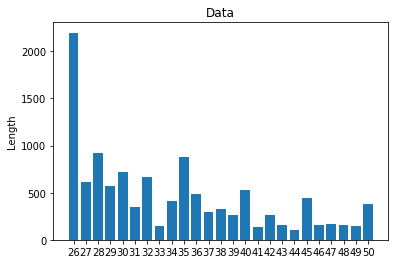

[2197, 615, 918, 570, 724, 350, 664, 143, 409, 880, 483, 293, 325, 266, 526, 132, 266, 157, 100, 440, 153, 170, 153, 148, 381]


In [49]:
describe_data(tuple([i for i in range(26,51)]), count[25:50])
print(count[25:50])

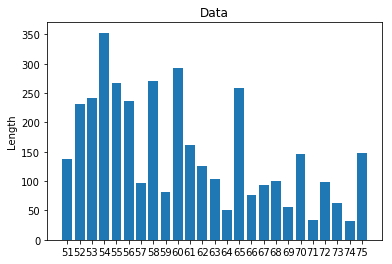

[138, 232, 241, 353, 268, 236, 97, 271, 82, 293, 161, 125, 103, 50, 259, 77, 94, 100, 56, 147, 33, 98, 63, 32, 148]


In [50]:
describe_data(tuple([i for i in range(51,76)]), count[50:75])
print(count[50:75])

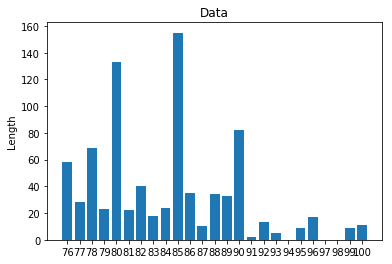

[58, 28, 69, 23, 133, 22, 40, 18, 24, 155, 35, 10, 34, 33, 82, 2, 13, 5, 0, 9, 17, 0, 0, 9, 11]


In [51]:
describe_data(tuple([i for i in range(76,101)]), count[75:100])
print(count[75:100])

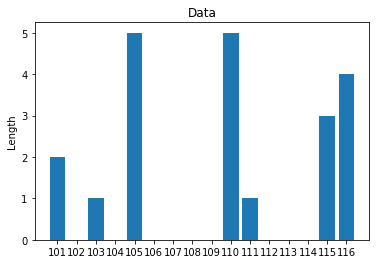

[2, 0, 1, 0, 5, 0, 0, 0, 0, 5, 1, 0, 0, 0, 3, 4]


In [52]:
describe_data(tuple([i for i in range(101,117)]), count[100:116])
print(count[100:116])